In [1]:
#import libraries import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D 
from keras.utils import to_categorical
from keras import backend as K
import numpy
import pandas as pd

In [2]:
#load dataset directly from keras library
(X_train, y_train), (X_test, y_test) = mnist.load_data()

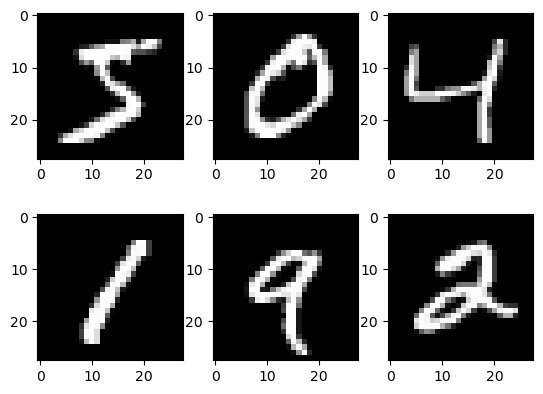

In [3]:
#plot first six samples of MNIST training dataset as gray scale image 
import matplotlib.pyplot as plt
for i in range(6):
    plt.subplot(int(' 23' + str(i+1)))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [4]:
#reshape format [samples] [width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype( 'float32' )
X_test= X_test.reshape(X_test.shape[0], 28, 28,1).astype( 'float32')
#Converts a class vector (integers) to binary class matrix
y_train = to_categorical (y_train) 
y_test=to_categorical (y_test)

In [5]:
#normalize inputs
X_train =X_train/ 255
X_test = X_test / 255

In [11]:
#define a CNN model 
def create_model():
    num_classes = 10
    #input_shape = (height==10, width==10, channels==2)  # Replace with your actual input shape

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
#build the model
model= create_model()

NameError: name 'Conv2D' is not defined

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13812\173692970.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img_gray.resize((28, 28), Image.ANTIALIAS)


1/1 [==============================] - 0s 159ms/step


In [ ]:
#fit the model
model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, batch_size=200, verbose=2)
print("The model has successfully trained")
#Save the model
model.save('model.h5')
print("The model has successfully saved")

In [ ]:
#Evaluate the model
scores =model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f88" % (100-scores [1]*100))

In [ ]:
%matplotlib inline


In [7]:
#import libraries
import os
import PIL
import cv2
import glob
import numpy as np
from tkinter import *
from PIL import Image, ImageDraw, ImageGrab

In [8]:
#load model
from keras.models import load_model
model =load_model(r'C:\Users\ADMIN\Downloads\model.h5')
print("Model load Successfully, Go for the APP")


Model load Successfully, Go for the APP


In [10]:
import gradio as gr
import numpy as np
from keras.models import load_model
from PIL import Image, ImageOps

# Load the pre-trained model
model = load_model('model.h5')

def recognize_digit(image):
    # Convert the Gradio Image object to a NumPy array
    img_array = np.array(image)

    # Convert RGB to grayscale
    img_gray = ImageOps.grayscale(Image.fromarray(img_array))

    # Resize the image to 28x28
    img_resized = img_gray.resize((28, 28), Image.ANTIALIAS)

    # Convert the image to a NumPy array and normalize
    img_data = np.array(img_resized).reshape(1, 28, 28, 1).astype('float32') / 255.0

    # Make prediction
    pred = model.predict(img_data)[0]
    final_pred = np.argmax(pred)
    confidence = int(max(pred) * 100)

    return f"The predicted digit is {final_pred} with {confidence}% confidence."

# Create a Gradio Interface
iface = gr.Interface(fn=recognize_digit, inputs="image", outputs="text")
iface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
